# 머신러닝 종류
## 지도 학습(Supervised Learning)
- 데이터에 대한 라벨이 주어진 상태에서 컴퓨터를 학습시키는 방법
- 분류와 회귀로 나뉘어진다.
    - 분류: 라벨 : 범주형 데이터/ 평가 도구 : 정확도
        - 미리 정의된 여러 클래스 레이블 중 하나로 분류하는 것
        - 스펨메일 분류
    - 회귀: 라벨 : 수치형 데이터/ 수치를 구함. 평가도구 : 오차
        - 연속적인 숫자를 예측하는 것
        - 집 가격 예측
    
    

## 비지도 학습(Unsupervised Learning)
- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법
- 데이터의 숨겨진 특징, 구조, 패턴을 파악하는데 사용
    - 클러스터링(Clustering) : 데이터를 비슷한 특성끼리 묶고 라벨을 붙여줌
    - 차원 축소(Dimensionality Reduction)
        - 학습이 되지 않는 복합한 과대 적합 시, 차원 축소 사용
        - 전처리용으로 특성 추출을 함 >> 데이터의 특성을 줄여 줌
- 특성에 대한 분석 방법
    - 주성분 분석 : 공통된 특성으로 구분
    - 독립성분 분석 : 차별적인(서로 다른) 특성으로 구분

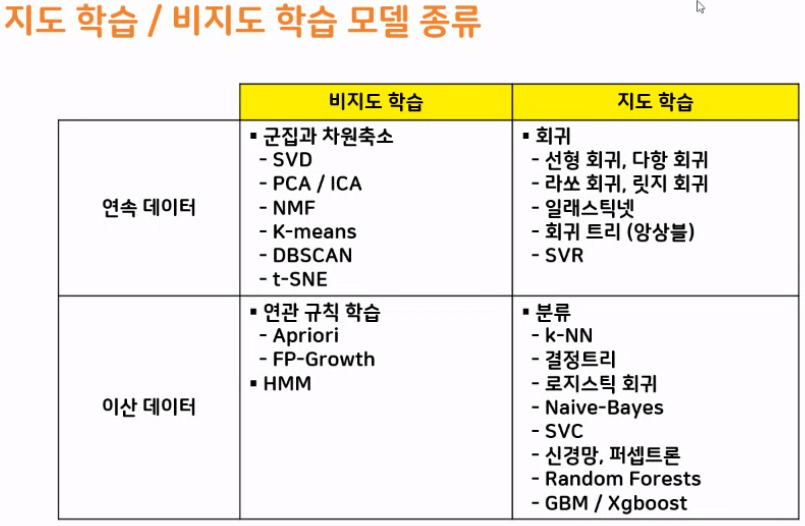

## scikit-learn
- 파이썬에서 쉽게 사용할 수 있는 머신러닝 프레임워크, 라이브러리
- 회귀, 분류, 군집, 차원축소, 특성 공학, 전처리, 교차 검증, 파이프 라인 등 머신러닝에 필요한 기능을 갖춤
- 학습을 위한 샘플 데이터도 제공

#### show-V도 많이 사용

### XOR(eXclusive OR) 연산 학습하기
- 가산기
- 비교기
- 로 많이 사용

#### knn = KNeighborsClassifier(n_neighbors = 1)
#### knn.fit(문제 데이터, 답)      # fit() : 훈련하는 기능
#### 예측한 답 = knn.predict(답을 얻고 문제 데이터)    # 예측하는 함수
#### score = metrics.accuracy_score(실제 답, 예측한 답)     # 정확도 계산, 실제 답과 예측(몇개 맞췄는지)

# Scikit-learn 프레임워크를 활용한 학습
- Scikit-learn 프레임워크 : 머신러닝과 관련된 데이터, 모델, 함수 등을 다양하게 가장 많이 활용된 머신러닝 프레임워크

In [1]:
import pandas as pd

In [2]:
# AND 논리 선언
data = [[0, 0, 0], 
        [0, 1, 0], 
        [1, 0, 0],
        [1, 1, 1]]


# pandas 데이터 (데이터프레임)로 변환
# 컬럼명 (A, B, AND)
df = pd.DataFrame(data, columns = ['A', 'B', 'AND'])
print(df)

   A  B  AND
0  0  0    0
1  0  1    0
2  1  0    0
3  1  1    1


In [3]:
# 특성 데이터와 라벨 데이터로 분리
# 특성 데이터: 여러개니까 '대문자'   /   라벨 데이터: 1개니까 '소문자'로 씀
#X = df[['A','B']]
X = df.loc[:,'A':'B']
#y = df['AND']
y1 = df.loc[:,'AND'] # 이렇게 특성은 슬라이싱, 라벨은 인덱싱하면 안됨(서로 다른 타입의 데이터가 됨)
y = df.loc[:, 'AND':]

In [4]:
print(X)  # DataFrame

   A  B
0  0  0
1  0  1
2  1  0
3  1  1


In [5]:
print(y1)  # 인덱싱으로 자르면 : Series 데이터

0    0
1    0
2    0
3    1
Name: AND, dtype: int64


In [6]:
print(y) # 슬라이싱으로 자르면 : DataFrame

   AND
0    0
1    0
2    0
3    1


In [7]:
# KNN 분류모델 로드
from sklearn.neighbors import KNeighborsClassifier

# 모델 선언
# n_neighbors : 가까이에 있는 참고하는 데이터의 수
knn_model = KNeighborsClassifier(n_neighbors = 1)

# 특성 데이터와 라벨 데이터를 입력해서 훈련 - fit(특성 데이터, 라벨 데이터)
knn_model.fit(X, y)  # 거리기반 방식으로 AND 연산 데이터 학습



C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [8]:
# 새로운 데이터를 입력해서 예측
new_X = [[1, 1], [0, 1], [0, 0], [1, 0]]
new_y = [1, 0, 0, 0]

# predict() : 생성된 모델을 이용해서 새로운 특성데이터의 라벨데이터를 예측
pred_y = knn_model.predict(new_X)

pred_y

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0, 0], dtype=int64)

In [9]:
# 평가(score, accuracy_score) - 정확도 구하는 함수
# score() : 훈련하고 나서 특성 데이터와 라벨 데이터로 정확도를 계산
# accuracy_score() : 예측한 라벨 과 원래 라벨을 비교하여 정확도를 계산
from sklearn.metrics import accuracy_score

print(knn_model.score(X, y)) # 기존 데이터로 정확도 구하는 함수 100점 : 머신러닝에서는 100점(=1.0)이 나올 경우 과대 접합일 가능성이 큼
print(accuracy_score(pred_y, new_y)) # 새로운 데이터로 정확도를 구하는 함수

1.0
1.0


- 먼저 데이터를 인식해야 하므로 대부분 데이터 분석후, 화살표 표시한 것들을 거의 동시에 함
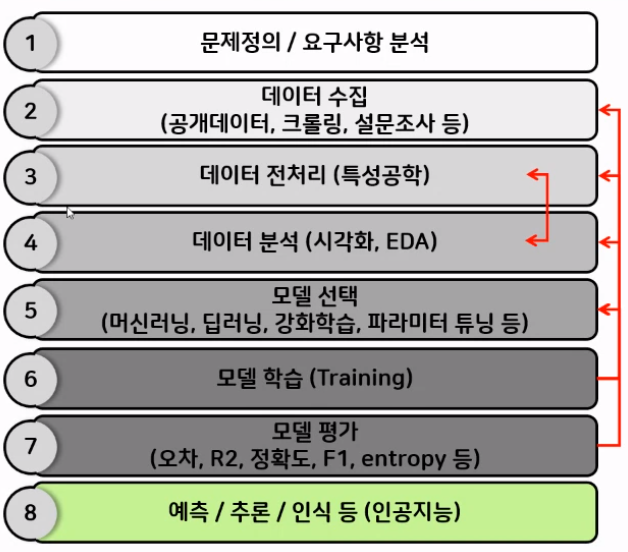

## Data collect(데이터 수집)
 - File(CSV, XML, JSON)
 - Datatbase
 - web Crawlring(뉴스, SNS, 블로그)
 - IoT 센서를 통한 수집
 - Surgvey

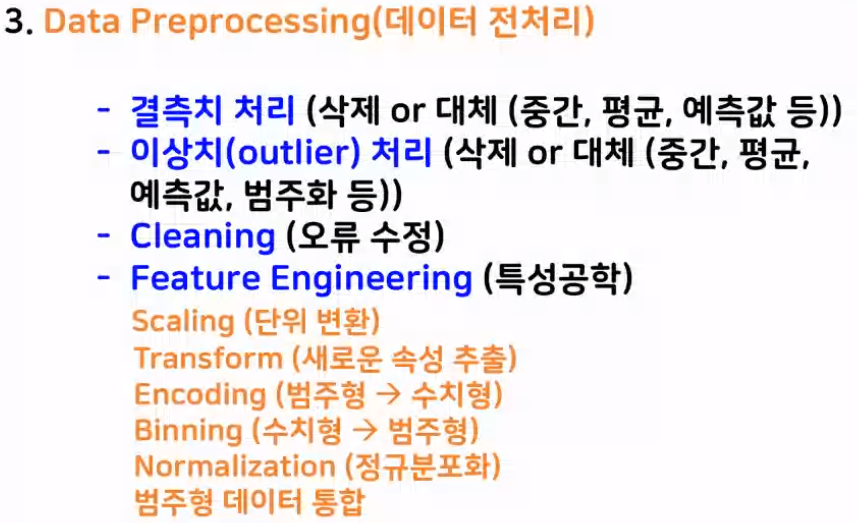

## 데이터 전처리 순서
1. 오류 수정(Cleansing)
2. 이상치(outlier)처리
3. 결측지 처리 : 클러스터링은 결측치 처리
    - 수치형 데이터 : 범주형 데이터로 바꾸는 이유 (나이같은 데이터, 클러스터링으로 정확도 증가)
    - 정규 분포화 : 성별 데이터를 여러 특성으로 더 쪼개서 정규분포처럼 만듦

## EDA(탐색적 데이터 분석)
- 기술 통계, 변수간 상관 관계
- 시각화
    - pandas, matplotlib, seaborn
- Feature Selection(사용할 특성 선택)
    - 특성이 작으면 늘리고, 많으면 줄임

## Matplotlib
- 단변수 시각화 : Histogram(빈도수), Boxplot(평균, 중간값 등)
- 이변수 시각화 : Scatter plot(수치, 상관관계), 누적 막대 그래프(범주, 독립성 분석), 범주별 Histogram
- 다변수 시각화 : Violin plot, 3차원 그래프 등

5. Model 선택, Hyper Parameter 조정(Tunning)
    - 목적에 맞는 적절한 모델 선택
    - KNN, SVM, Linear Regression, Ridge, Lasso, Decision Tree, Random
6. Model Training(학습)
    - model.fit(X_train, y_train)
        - train 데이터와 test 데이터를 7:3 정도로 나눔(or 75% : 25% . 훈련 데이터가 더 많아야 함)
        - train data(훈련 데이터) : 모델을 만드는 데이터
        - test data : 평가하기 위한 데이터
    - model.predict(X_test)
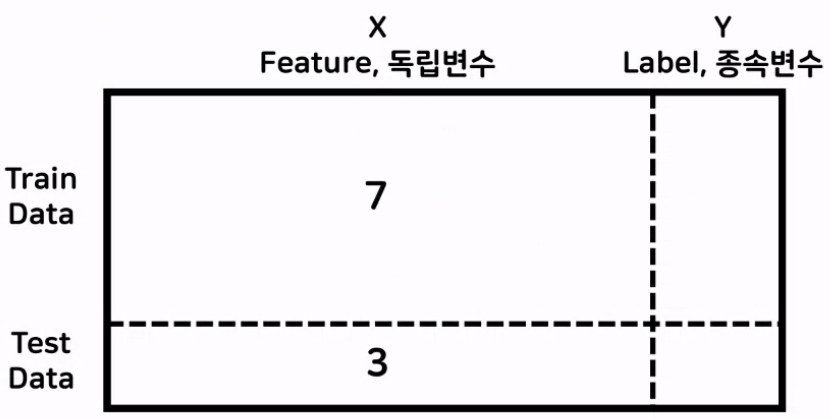

7. Evaluation(평가)
    - MSE / RMSE
    - R2 Score
    - accuracy(정확도)
    - recall(재현율)
    - precision(정밀도)
    - f1 score

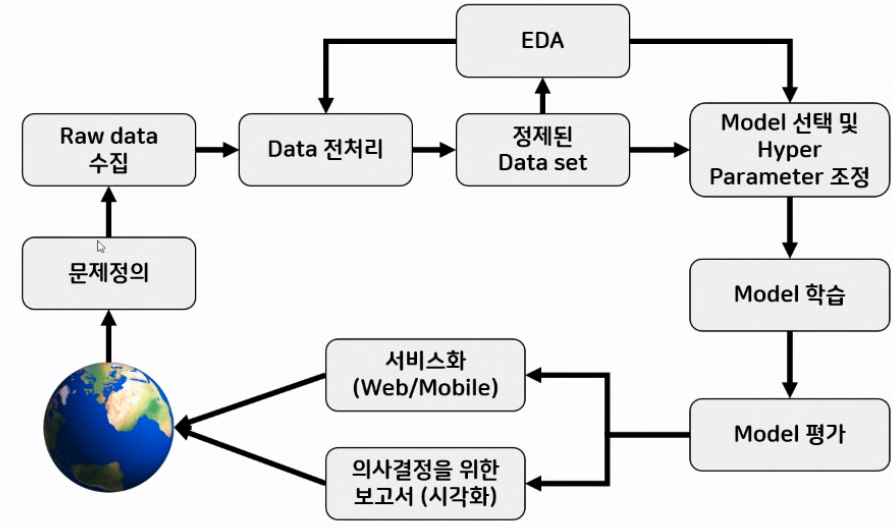
- 통계 데이터를 잘 안쓰는 이유 : 너무 깔끔하게 정제되어 내가 얻고 싶은 결과를 얻을 수 없음
    - 우리는 raw data를 원함

# KNN

## 1. 요구사항 분석 및 문제 정의
- 간단한 EDA와 관련된 함수를 학습
- BMI 데이터를 확인해 보고 잘 분류가 될 수 있는지 시각화
- KNN의 개념에 대해 학습
- KNN을 이용해서 학습
- 머신러닝 프로세스에 대해 학습

## 2. 데이터 수집

In [10]:
# 비만도(BMI) 데이터를 이용해 학습 해보자.
bmi = pd.read_csv('data/bmi_500.csv')
print(bmi)

     Gender  Height  Weight            Label
0      Male     174      96          Obesity
1      Male     189      87           Normal
2    Female     185     110          Obesity
3    Female     195     104       Overweight
4      Male     149      61       Overweight
..      ...     ...     ...              ...
495  Female     150     153  Extreme Obesity
496  Female     184     121          Obesity
497  Female     141     136  Extreme Obesity
498    Male     150      95  Extreme Obesity
499    Male     173     131  Extreme Obesity

[500 rows x 4 columns]


# EDA(탐색적 데이터 분석)

In [11]:
# 처음부터 일부 데이터를 확인
# 괄호 안에 숫자를 입력하면 해당 숫자만큼 출력
print(bmi.head())

# 끝에서 부터 일부 데이터를 확인
print(bmi.tail())

   Gender  Height  Weight       Label
0    Male     174      96     Obesity
1    Male     189      87      Normal
2  Female     185     110     Obesity
3  Female     195     104  Overweight
4    Male     149      61  Overweight
     Gender  Height  Weight            Label
495  Female     150     153  Extreme Obesity
496  Female     184     121          Obesity
497  Female     141     136  Extreme Obesity
498    Male     150      95  Extreme Obesity
499    Male     173     131  Extreme Obesity


In [12]:
# 데이터의 정보를 출력하는 함수
# 데이터의 수, 컬럼의 특성 - 결측치 확인
# Dtype : object(범주형), int/ float(수치형)
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [13]:
# 범주형 컬럼의 클래스의 목록을 출력하는 함수
print(bmi['Gender'].unique())
print(bmi['Label'].unique())

['Male' 'Female']
['Obesity' 'Normal' 'Overweight' 'Extreme Obesity' 'Weak' 'Extremely Weak']


In [14]:
# 범주형 컬럼의 클래스별 갯수를 확인
# value_counts()의 목적 : 데이터가 한쪽으로 치우쳐 있는 확인
# 데이터 양이 너무 적으면 버리거나 통합시킴
print(bmi['Gender'].value_counts())
print()
print(bmi['Label'].value_counts())

Female    255
Male      245
Name: Gender, dtype: int64

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64


In [15]:
# 수치형 데이터의 편향(치우침)을 확인하는 함수
# 0 : 정규분포(Gausian 분포)
# 양수 : 왼쪽으로 치우친 데이터
# 음수 : 오른쪽으로 치우친 데이터
print(bmi['Height'].skew())
print(bmi['Weight'].skew())

-0.12191368980139153
-0.037692236922098034


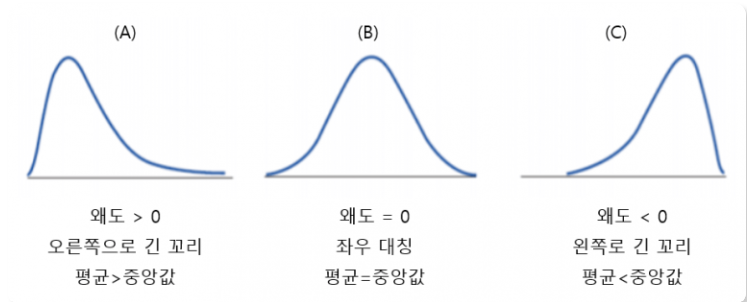

In [16]:
# 데이터의 간단한 기술통계를 보여주는 함수
# 데이터의 개수, 평균, 표준편차, 최소값/ 25%/ 중간값/ 75%/ 최대값
# 결측치/ 이상치/ 편향(치우침 정도) : 평균값(mean)과 중간값(50%)을 비교하면 됨
# max와 75% or min과 25% 를 비교하여 차이가 많이나면 이상치가 있을 가능성이 높음
# 범주형 데이터를 넣으면 범주형 데이터로 나옴
print(bmi.describe())

           Height      Weight
count  500.000000  500.000000
mean   169.944000  106.000000
std     16.375261   32.382607
min    140.000000   50.000000
25%    156.000000   80.000000
50%    170.500000  106.000000
75%    184.000000  136.000000
max    199.000000  160.000000


# BMI 데이터가 분류가 될 수 있는 데이터인지 확인

In [17]:
# matplotlib : 파이썬 시각화 도구
# seaborn : matplotlib에 고급 시각화 도구를 제공
import matplotlib.pyplot as plt

# scatter : 산포도를 그리는 함수(2차원 자표에 점을 찍는 함수)
# x 좌표 : Weight  / y 좌표 : Height
def myScatter(label, color) :
    # 매개변수로 넘어 온 라벨의 해당 값들을 저장
    tmp = bmi[bmi["Label"] == label]
    
    # 입력한 라벨값만 산포도를 그림
    # scatter(x좌표, y좌표, 색상, 라벨)
    plt.scatter(tmp['Weight'], tmp['Height'], c=color, label = label)
    
    # plt.show() : 여러 그래프를 구분하기 위한 것(안 쓰면 한 곳에 겹쳐서 출력됨. 쓰면 그전 것은 끊어지고 출력됨)

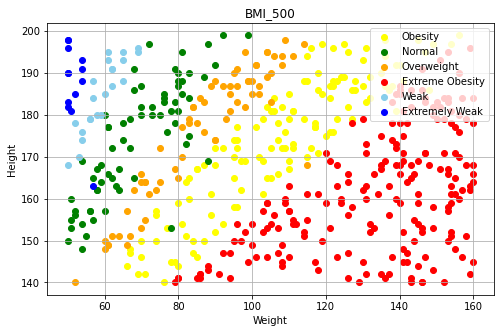

In [18]:
label = ['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extremely Weak']
color = ['yellow', 'green', 'orange', 'red', 'skyblue', 'blue']

# 그래프의 크기 설정
plt.figure(figsize = (8, 5))

for i in range(len(label)) :
    myScatter(label[i], color[i])
    

# 범례 추가 (loc : 범례 위치)
# loc를 써 주지 않으면 알아서 데이터가 가장 작게 분포된 위치에 표시
plt.legend(loc='upper right')

# x축 라벨 표시
plt.xlabel("Weight")

# y축 라벨 표시
plt.ylabel('Height')


# 제목 표시
plt.title('BMI_500')

# 격자 표시
plt.grid()

plt.show()

- 다른 색의 데이터가 주로 있는 곳에 있는 점들은 잘못 분류될 가능성이 높음
- 그 점들을 같은 색이 있는 위치로 옮겨줄 수 있는 방법이 있다면 정확도가 올라감(방법을 찾아보자!)

#  학습 데이터로 변환
- 특성 데이터와 라벨 데이터로 분리
- 훈련 데이터와 테스트 데이터로 분리

In [19]:
# 특성 데이터와 라벨 데이터로 분리
bmi_X = bmi.loc[:, 'Height':'Weight']
bmi_y = bmi.loc[:,'Label':]
print(bmi_X.shape, bmi_y.shape)

(500, 2) (500, 1)


In [20]:
# 훈련 데이터와 테스트 데이터로 분리(훈련 70%, 테스트 30%)
X_train = bmi_X.iloc[:350, :]
y_train = bmi_y.iloc[:350, :]
X_test = bmi_X.iloc[350:, :]
y_test = bmi_y.iloc[350:, :]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350, 1) (150, 2) (150, 1)


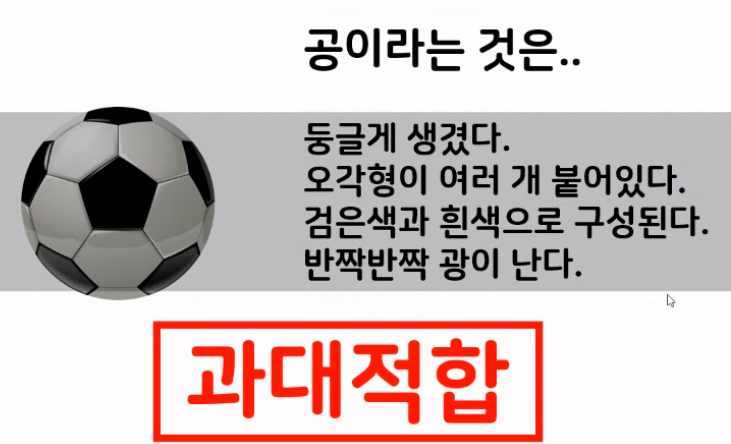
### 과대 적합(= Overfitting, 과적합)
- 농구공을 주면 공인 줄 모름
- 조금만 틀려도 못찾음
- 조금의 여유(margin)을 주자

#### 원인
1. 데이터가 적어서
2. 특성 너무 많아서(너무 복잡해서)

- 데이터 수집은 어려우므로 특성을 줄이자!!
- 가장 좋은 방법은 데이터 양을 늘리는 것



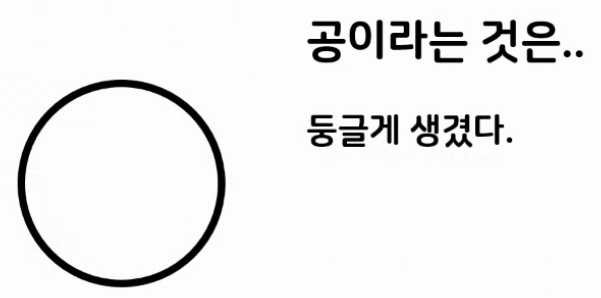
### 과소적합(= Underfitting)
- 원을 공이라고 함

#### 원인
- 데이터가 적어서
- 특성이 적어서

- 차원 축소를 통해 특성을 늘릴 수 있다.

### 일반화(Generalization)
- 훈련 세트로 학습한 모델이 테스트 세트에 대해 정확히 예측하도록 하는 것

### 과대적합
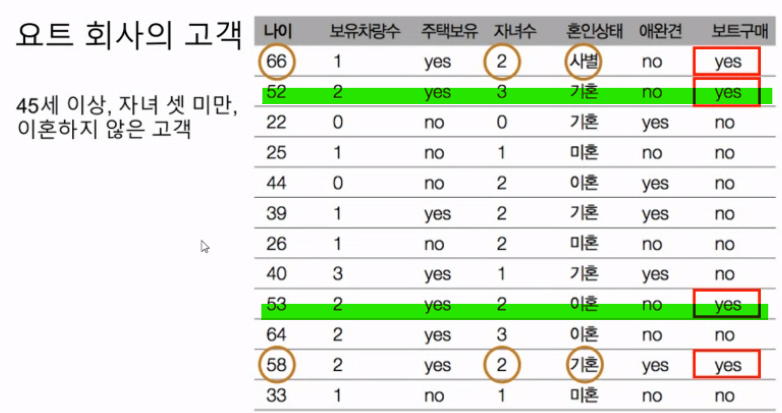
### 과소적합
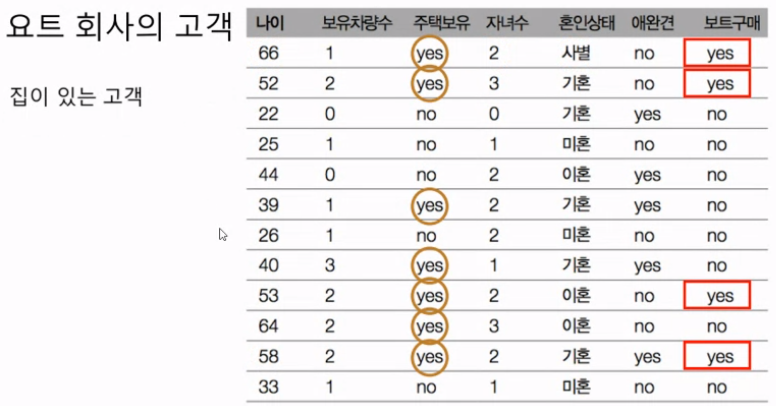

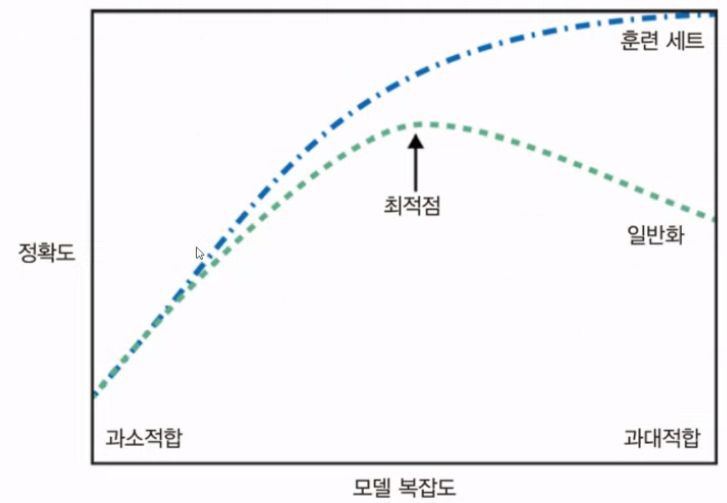
- 이진분류에서 50%는 찍은 것!
- 무조건 50%는 넘어야 함

### 과소 적합
- 훈련 정확도 ↓
- 테스트 정확도 ↓
- 훈련 정확도 < 테스트 정확도(인 경우도 있음)
- 해결 방법 : 데이터 양이나 특성을 늘림, 또는 데이터 전처리를 더 잘함, 파라미터를 약간 수정, 모델수정(모델 수정은 거의 안함)

### 과대 적합
- 훈련 정확도 >>> 테스트 정확도 (훈련 정확도와 테스트 정확도의 차이가 아주 큼)
- 해결 방법 : 특성을 줄여줌

#### 우리의 목표 : 훈련 정확도와 테스트 정확도의 차이를 최대한 줄이는 것

### 해결 방법
- 주어진 훈련 데이터의 다양성 보장 >> 다양한 데이터 포인트를 골고루 나타내야 하낟.
    - 편향된 데이터는 아무리 많아도 도움X >> 정규화를 시켜 주어야 함
- 일반적으로 데이터 양이 많으면 일반화에 도움이 된다.
- 하지만 편중된 데이터를 많이 모드는 것은 도움이 되지 않는다.
- 규제(Regularization)을 통해 모델읠 복잡도를 적정선으로 조정한다.

# KNN(K-Nearest Neighbors, k- 최근접 이웃 알고리즘)
- 새로운 데이터 포인트와 가장 가까운 훈련 데이터셋의 데이터 포인트를 찾아 예측
- k 값에 따라 가까운 이웃의 수가 결정
#### k는 꼭 홀수 개여야 정확히 판별 할 수 있음
- 분류와 회귀에 모두 사용 가능
    - 분류 : 가장 많은 값으로 채택 됨
    - 회귀 : 해당 모델 값의 평균을 내면 됨
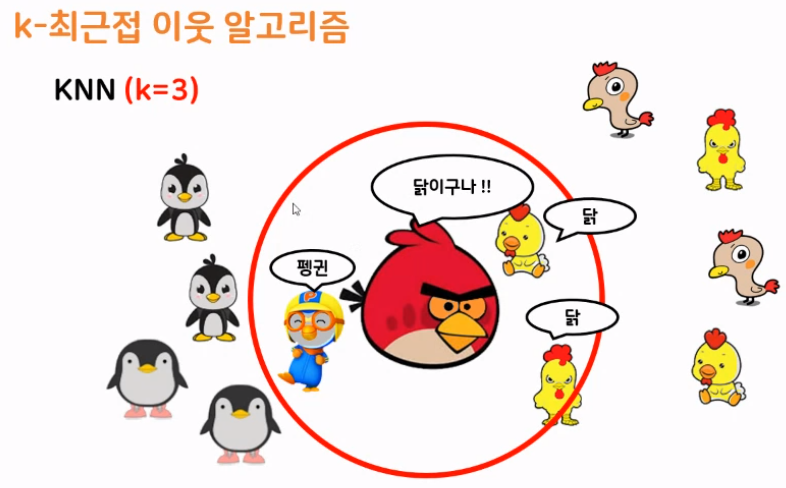
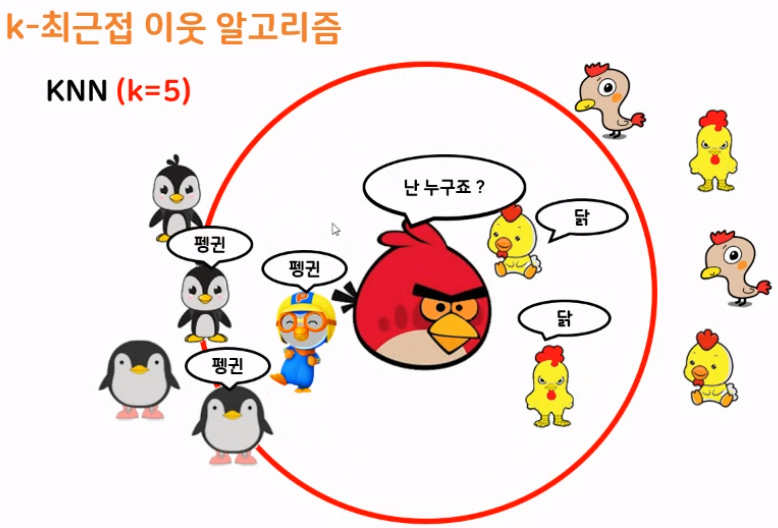

#### k-최근접 이웃 알고리즘
- 결정경계(Decision Boundary) : 클래스 분류하는 경계
    - 이웃이 적을수록 모델의 복잡도 상승 >> 과대적합
        - 왜냐하면 한사람한사람 다 물어봐야 하므로(k가 적을 경우 >> 과대적합)
        - 데이터가 살짝만 달라져도 결정 경계가 달라져서 정확도가 떨어짐
        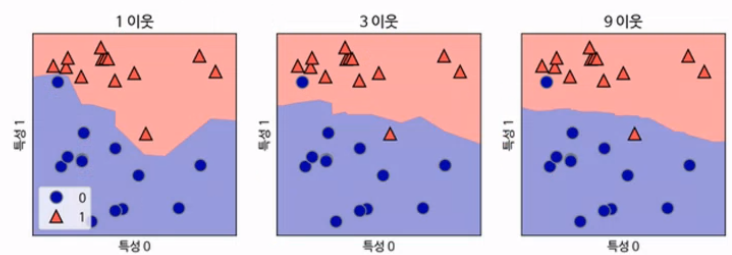
    - 이웃이 전체 데이터 개수와 같아지면 항상 가장 많은 클래스로 예측 >> 과소적합
        - 특성이 정리가 되므로(k가 많을 경우 >> 과소적합)
        - 데이터가 달라져도 결정 경계가 변하지 않아서 정확도가 올라감
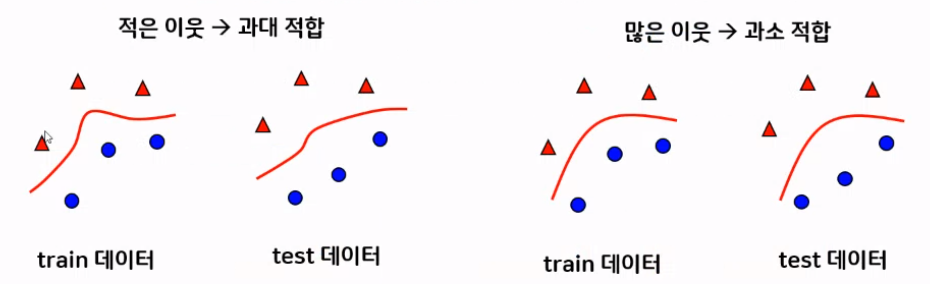

### 데이터 포인트(sample) 사이 거리 값 측정 방법
- 유클리디안 거리 : 피타고라스의 정리 이용(최단 거리)
- 멘하탄 거리 : 길 따라 가는 거리
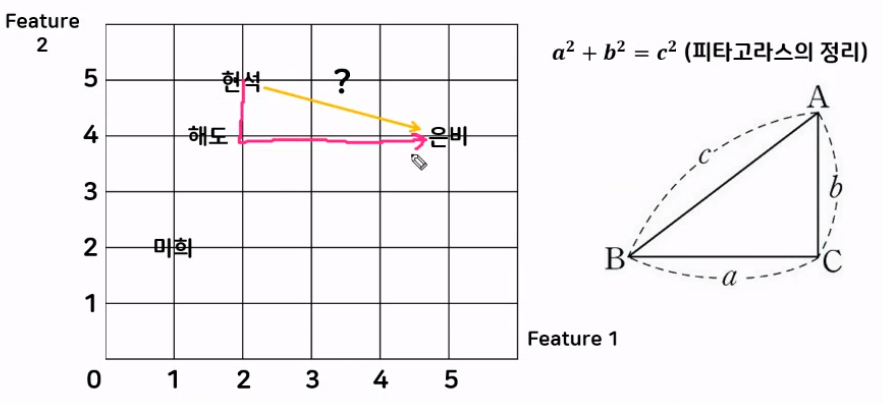

#### 주요 매개변수(Hyperparameter)

# KNN으로 BMI 데이터 학습

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors : 이웃의 수
# 이웃의 수가 적으면 과대적합
# 이숫의 수가 많으면 과소적합
# Hyper Parameter Tuning : 적당한 이웃의 수를 결정하는 것
knn_model = KNeighborsClassifier(n_neighbors = 3)
# 훈련은 훈련 데이터로
knn_model.fit(X_train, y_train)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [22]:
# 정확도 계산
# 훈련 정확도와 테스트 정확도가 모두 낮으면 >> 과소 적합
# 훈련 정확도보다 테스트 정확도가 높으면 >> 과소 적합
# 훈련 정확도와 테스트 정확도가 크게 차이나면 >> 과대 적합
# 일반화 모델 : 훈련정확도가 테스트 정확도가 약간 높은 모델
print("훈련 정확도 : ", knn_model.score(X_train, y_train))
print("테스트 정확도 : ", knn_model.score(X_test, y_test))

훈련 정확도 :  0.9342857142857143
테스트 정확도 :  0.9


- 이웃의 수가 감소하면 과대적합이 생김( 훈련 정확도와 테스트 정확도 간의 격차가 커짐)

In [23]:
knn_model2 = KNeighborsClassifier(n_neighbors = 1)
knn_model2.fit(X_train, y_train)

print("훈련 정확도 : ", knn_model2.score(X_train, y_train))
print("테스트 정확도 : ", knn_model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8933333333333333


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
knn_model3 = KNeighborsClassifier(n_neighbors = 10)
knn_model3.fit(X_train, y_train)

print("훈련 정확도 : ", knn_model3.score(X_train, y_train))
print("테스트 정확도 : ", knn_model3.score(X_test, y_test))

# neighbors의 수가 정확도를 좌우

훈련 정확도 :  0.9085714285714286
테스트 정확도 :  0.94


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


- 일반화된 모델을 찾아보자 - 하이퍼파라미터 튜닝

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

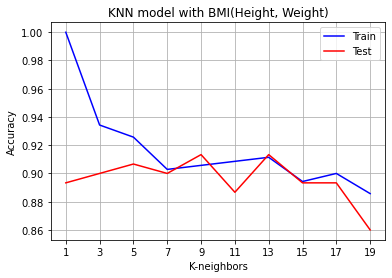

In [25]:
import matplotlib.pyplot as plt
# 이웃의 수마다의 정확도
train_acc = []
test_acc = []

# 사용할 이웃의 범위 값들을 정의
# k 는 가능한 '홀수'로 잡는다!
# 데이터가 많을 경우 중, 짝수일 때, 더 잘 나오는 경우에 드물게 쓰는 경우가 있다.
neighbor = range(1, 20, 2)

for n in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test, y_test))
plt.plot(range(1, 20, 2), train_acc, c='b', label = 'Train')
plt.plot(range(1, 20, 2), test_acc, c = 'r', label = 'Test')
plt.xticks(range(1, 20, 2), labels = range(1, 20, 2))
plt.ylabel('Accuracy')
plt.xlabel('K-neighbors')
plt.title('KNN model with BMI(Height, Weight)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

- 훈련 정확도 > 테스트 정확도 인 것 중, 격차가 적은 k=3 or k=5를 선택!!
- k=7인 경우 매우 차이가 적지만 이런 경우, 언제 결과가 뒤집힐 지 모르기 때문에 선택X


### 특성 수를 증가시켜서 과소적합을 줄여보자.

In [26]:
bmi.head()

Gender  Height  Weight       Label
0    Male     174      96     Obesity
1    Male     189      87      Normal
2  Female     185     110     Obesity
3  Female     195     104  Overweight
4    Male     149      61  Overweight

In [27]:
# Gender 컬럼에서 Male -> 0으로 Female -> 1로 변경
bmi['Gender'] = bmi['Gender'].map({"Male":0, "Female": 1})
# 다른 방법들
# bmi['Gender'] = bmi['Gender'].replace({'Male' : 0, 'Female' : 1})
# bmi1=bmi['Gender'].replace(['Male','Female'],[0,1])
# bmi['Gender'].replace("Male",1).replace("Female",0)

In [28]:
# 특성 데이터와 라벨 데이터로 분리
bmi_X = bmi.loc[:, 'Gender':'Weight']
bmi_y = bmi.loc[:,'Label':]

In [29]:
# 훈련 데이터와 테스트 데이터로 분리(훈련 70%, 테스트 30%)
X_train = bmi_X.iloc[:350, :]
y_train = bmi_y.iloc[:350, :]
X_test = bmi_X.iloc[350:, :]
y_test = bmi_y.iloc[350:, :]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 3) (350, 1) (150, 3) (150, 1)


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[]

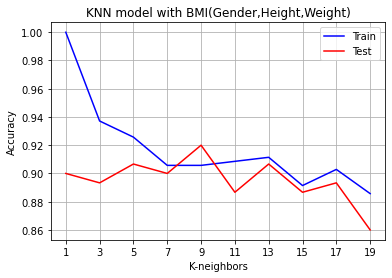

In [30]:
train_acc= []
test_acc = []

neighbor = range(1, 20, 2)
for i in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

plt.plot(neighbor, train_acc, c = 'b', label = 'Train')
plt.plot(neighbor, test_acc, c = 'r', label = 'Test')
plt.xticks(neighbor, labels = neighbor)
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper right')
plt.grid()
plt.title('KNN model with BMI(Gender,Height,Weight)')
plt.show()

- 특성들끼릴 각각 곱해서 새로운 특성 추가

In [31]:
X_train2 = X_train.copy()

# 컬럼의 이름들을 가져온다.
col = X_train2.columns
for i in range(col.size) :
    for j in range(i,col.size) :
        X_train2[col[i] + 'x' + col[j]] = X_train2[col[i]] * X_train2[col[j]]
X_train2.head()

Gender  Height  Weight  GenderxGender  GenderxHeight  GenderxWeight  \
0       0     174      96              0              0              0   
1       0     189      87              0              0              0   
2       1     185     110              1            185            110   
3       1     195     104              1            195            104   
4       0     149      61              0              0              0   

   HeightxHeight  HeightxWeight  WeightxWeight  
0          30276          16704           9216  
1          35721          16443           7569  
2          34225          20350          12100  
3          38025          20280          10816  
4          22201           9089           3721

In [32]:
X_test2 = X_test.copy()

col = X_test2.columns
for i in range(col.size) :
    for j in range(i,col.size) :
        X_test2[col[i] + 'x' + col[j]] = X_test2[col[i]] * X_test2[col[j]]

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

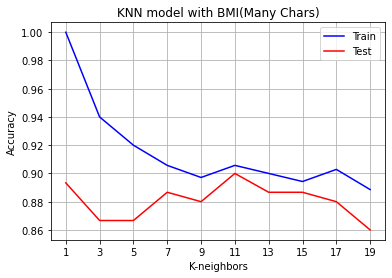

In [33]:
train_acc = []
test_acc = []

neighbor = range(1, 20, 2)
for i in neighbor :
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train2, y_train)
    train_acc.append(knn_model.score(X_train2,y_train))
    test_acc.append(knn_model.score(X_test2, y_test))
plt.plot(neighbor, train_acc, c = 'b', label = 'Train')
plt.plot(neighbor, test_acc, c = 'r', label = 'Test')
plt.xticks(neighbor, labels = neighbor)
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')
plt.title('KNN model with BMI(Many Chars)')
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

In [34]:
# knn_model.predict(데이터?)
# knn_model.accuracy_score(예측 라벨, 실제 라벨) : 정확도
# knn_model.score(테스트 데이터, 테스트 라벨) : 정확도

# K-Nearest Neighbors (KNN) 회귀

### 보스톤 집값 데이터셋
- 506개의 데이터
- 13개의 정보와 1개의 클래스로 구성
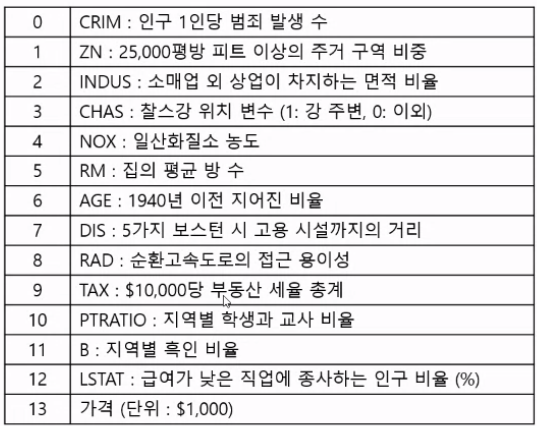

# 보스턴 집값 데이터를 이용한 KNN 회귀
## 문제 정의
- 보스턴 집값 데이터에서 어떤 특성이 집값에 얼마만큼 영향을 주는 지 분석
- 다중 공선성 문제에 대한 이해
- KNN을 이용한 회귀분석

## 데이터 수집


In [50]:
# sklearn에서는 교육용 데이터셋으로 딕셔너리형태로 데이터를 제공
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.keys())
# data : 특성 데이터
# target : 라벨 데이터
# feature_names : 컬럼명
# DESCR : 컬럼에 대한 설명

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


## 데이터 시각화 및 분석
- 딕셔너리를 데이터프레임으로 변환
- 특성과 라벨 간의 상관관계 분석
- 분석 결과를  히트맵으로 시각화

In [51]:
import pandas as pd

df_feature = pd.DataFrame(boston['data'],columns= boston['feature_names'])
print(df_feature)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [52]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [54]:
print(df_feature.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [64]:
df_label = pd.DataFrame(boston['target'], columns=['price'])
print(df_label.head())

   price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


In [59]:
# 특성 데이터와 라벨 데이터를 하나의 데이터프레임으로 병합 << concat()
# axis =  1 : 열 방향으로 병합
df_boston = pd.concat([df_feature, df_label], axis = 1 )
print(df_boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [61]:
# 특성과 라벨의 상관관계 분석 : price 행의 값을 분석
print(df_boston.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

- 양의 값 : 집 값을 올리는 정도 / max : RM(방의 수)
- 음의 값 : 집 값을 떨어뜨리는 정도 / max : LSTAT
- 0에 가까운 값 : 집 값과 관련이 없는 특성
# .

# 다중공선성
- (공선: 두 데이터가 거의 유사, 다중공선성 : 셋 이상의 데이터가 거의 유사)
#### 특성 간의 공선성(데이터 유사성) 문제
- 특성과 특성 간의 상관관계가 90% 이상인 것(아주 가까운 평행선 혹은 기울기가 약간만 다른 직선)
- 특성과 라벨 간의 상관관계 더 낮은 특성을 삭제하거나 처리(데이터가 적은 경우)
#### 특성과 라벨의 공선성(데이터의 유사성) 문제
- 특성과 라벨 간의 상관관계가 90% 이상인 것
- 해당 특성을 삭제하거나 처리.(왜냐하면 다른 데이터의 영향력이 거의 없어지기 때문에 공선성이 있는 특성의 영향만 받는다.)

### train_test_split : 훈련 데이터와 테스트 데이터를 분리해 주는 함수
- 훈련 75%, 테스트 25%로 분리

In [67]:
from sklearn.model_selection import train_test_split


# 먼저 특성을 분리 후, 라벨을 분리!(순서대로가 아니라 랜덤으로 고름)
# random_state : 랜덤 시드를 설정
# 슬라이싱으로 전에 했던 것처럼 훈련, 테스트 데이터를 분리하면 라벨이 고르게 정리된 것이 잘려올 가능성이 있음
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state = 7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379,) (127,)


# 6. 모델  선택 및 훈련

In [69]:
from sklearn.neighbors import KNeighborsRegressor

# 회귀 분석은 ~Regressor 불러옴
# 회귀 분석 : 수치를 추정
knn_model4 = KNeighborsRegressor(n_neighbors = 5)
knn_model4.fit(X_train, y_train)

KNeighborsRegressor()

## 평가 (회귀분석 평가도구 : 오차)
### 오차가 작으면 좋은 모델 인가요?
- 1번 모델의 오차 : 10, - 100 => -90
- 2번 모델의 오차 : 2, 3 => 5

#### 음수를 양수로 변경하는 방법 : 
    - 제곱 -> 평균제곱오차(Mean Squared Error : MSE)
    - 절대값 -> 평균절대값오차(Mean Absolute Error : MAE)
- MSE를 더 선호 : 왜냐하면, 제곱하기 때문에 좋은 모델과 나쁜 모델을 구분하기 쉬움
- 시간이 부족할 경우에는 MAE를 사용하기도 함(계산하기 더 편하기 때문)

In [72]:
from sklearn.metrics import mean_squared_error
# import로 mean_absolute error 등 다양한 함수 불러올 수 있음

pred_train = knn_model4.predict(X_train)
pred_test = knn_model4.predict(X_test)

print('훈련 오차 : ', mean_squared_error(pred_train, y_train))
print('테스트 오차 : ', mean_squared_error(pred_test,y_test))

훈련 오차 :  25.2812073878628
테스트 오차 :  40.725077165354335


In [73]:
# MSE는 제곱을 한 값이라 원래 값이 아님 >> 제곱근 사용
import numpy as np

print('훈련 실제 오차 : ', np.sqrt(mean_squared_error(pred_train, y_train)))
print('테스트 실제 오차 : ', np.sqrt(mean_squared_error(pred_test,y_test)))

훈련 오차 :  5.028042102833149
테스트 오차 :  6.381620261763805


In [74]:
from sklearn.metrics import mean_absolute_error

print('훈련 오차 : ', mean_absolute_error(pred_train, y_train))
print('테스트 오차 : ', mean_absolute_error(pred_test,y_test))

훈련 오차 :  3.4392612137203167
테스트 오차 :  4.519685039370079
